In [5]:
import numpy as np
import scipy as sp
import scipy.sparse.linalg as linalg
import matplotlib.pyplot as plt
%matplotlib inline

# Task 1: 1D PEC-PMC Cavity, Eigenmode formulation

## Maxwell Equations (time domain)
\begin{equation}
\nabla \times E = - \mu \frac{\partial H}{\partial t}
\end{equation}

\begin{equation}
\nabla \times H = \epsilon \frac{\partial E}{\partial t}
\end{equation}

## Time Domain $\rightarrow$ Frequency Domain

Using the Fourier transform we get:

\begin{equation}
E(r, t) \rightarrow E(r, \omega)
\end{equation}

\begin{equation}
\frac{\partial E}{\partial t} \rightarrow i\omega E
\end{equation}

Thus our wave equation transforms into:

\begin{equation}
\nabla E = - i \omega \mu H
\end{equation}

\begin{equation}
\nabla E = - i \omega \epsilon E
\end{equation}

## 1D Coordinates

\begin{equation}
{H_y}_{i}, {E_z}_{i+\frac{1}{2}}, i \in \mathcal{N}
\end{equation}

\begin{equation}
\frac{\partial E_z}{\partial x} = - i \omega \mu H_y
\end{equation}

\begin{equation}
\frac{\partial H_y}{\partial x} = i \omega \epsilon E_z
\end{equation}

## Discretization
\begin{equation}
\frac{\partial {E_z}_i}{\partial x} \approx \frac{{E_z}_{i+1} - {E_z}_{i-1}}{\Delta x}
\end{equation}

Forward difference
\begin{equation}
-i\omega\mu {E_z}_{i+\frac{1}{2}} \approx \frac{{H_y}_{i+1} - {H_y}_{i}}{\Delta x}
\end{equation}

Backward difference
\begin{equation}
-i\omega\epsilon {H_y}_{i} \approx \frac{{E_z}_{i+\frac{1}{2}} - {E_z}_{i-\frac{1}{2}}}{\Delta x}
\end{equation}

## Wave equation

\begin{equation}
H_y = \frac{i}{\omega \mu }\frac{\partial E_z}{\partial x}
\end{equation}

\begin{equation}
E_z = \frac{-i}{\omega \epsilon }\frac{\partial H_y}{\partial x}
\end{equation}

\begin{equation}
\frac{\partial}{\partial x}\frac{i}{\omega \mu }\frac{\partial}{\partial x} E_z = i \omega \epsilon E_z
\end{equation}

\begin{equation}
\frac{1}{\epsilon}\frac{\partial}{\partial x}\frac{1}{\mu}\frac{\partial}{\partial x} E_z = \omega^2 E_z
\end{equation}

or
\begin{equation}
\frac{1}{\mu}\frac{\partial}{\partial x}\frac{1}{\epsilon}\frac{\partial}{\partial x} H_y = \omega^2 H_y
\end{equation}

## Matrix form
\begin{equation}
H_y = \frac{i}{\omega \mu }\frac{\partial E_z}{\partial x} \approx \frac{i}{\omega \mu }\frac{{E_z}_{i+\frac{1}{2}} - {E_z}_{i-\frac{1}{2}}}{\Delta x}
\end{equation}

\begin{equation}
\begin{bmatrix}
    {H_y}_{0} \\
    {H_y}_{1} \\
    \vdots \\
    {H_y}_{n-1} \\    
    {H_y}_{n}    
\end{bmatrix} 
=
\frac{i}{\omega \mu \Delta x}
\begin{bmatrix}
    1      & 0      & 0      & \dots  & 0      \\
    -1     & 1      & 0      & \dots  & 0      \\
    0      & -1     & 1      & \dots  & \vdots \\
    \vdots & \vdots & \vdots & \ddots & 0      \\
    0      & 0      & \dots  & -1     & 1
\end{bmatrix}
\begin{bmatrix}
    {E_z}_{0+\frac{1}{2}} \\
    {E_z}_{1+\frac{1}{2}} \\
    \vdots \\
    {E_z}_{n-\frac{1}{2}} \\    
    {E_z}_{n+\frac{1}{2}}    
\end{bmatrix} 
\end{equation}

\begin{equation}
E_z = \frac{-i}{\omega \epsilon }\frac{\partial H_y}{\partial x} \approx \frac{-i}{\omega \epsilon } \frac{{H_y}_{i+1} - {H_y}_{i}}{\Delta x}
\end{equation}

\begin{equation}
\begin{bmatrix}
    {E_z}_{0+\frac{1}{2}} \\
    {E_z}_{1+\frac{1}{2}} \\
    \vdots \\
    {E_z}_{n-\frac{1}{2}} \\    
    {E_z}_{n+\frac{1}{2}}    
\end{bmatrix}
=
\frac{i}{\omega \mu \Delta x}
\begin{bmatrix}
    -1     & 1      & 0      & \dots  & 0      \\
    0      & -1     & 1      & \dots  & 0      \\
    0      & 0      & -1     & \dots  & \vdots \\
    \vdots & \vdots & \vdots & \ddots & 1      \\
    0      & 0      & \dots  & 0      & -1
\end{bmatrix}
\begin{bmatrix}
    {H_y}_{0} \\
    {H_y}_{1} \\
    \vdots \\
    {H_y}_{n-1} \\    
    {H_y}_{n}    
\end{bmatrix} 
\end{equation}

\begin{equation}
\omega^2 E_z = \frac{1}{\epsilon}\frac{\partial}{\partial x}\frac{1}{\mu}\frac{\partial}{\partial x} E_z
\end{equation}

\begin{equation}
\omega^2
\begin{bmatrix}
    {E_z}_{0+\frac{1}{2}} \\
    {E_z}_{1+\frac{1}{2}} \\
    \vdots \\
    {E_z}_{n-\frac{1}{2}} \\    
    {E_z}_{n+\frac{1}{2}}    
\end{bmatrix}
=
\frac{i}{\mu \Delta x}
\begin{bmatrix}
    -1     & 1      & 0      & \dots  & 0      \\
    0      & -1     & 1      & \dots  & 0      \\
    0      & 0      & -1     & \dots  & \vdots \\
    \vdots & \vdots & \vdots & \ddots & 1      \\
    0      & 0      & \dots  & 0      & -1
\end{bmatrix}
\frac{i}{\mu \Delta x}
\begin{bmatrix}
    1      & 0      & 0      & \dots  & 0      \\
    -1     & 1      & 0      & \dots  & 0      \\
    0      & -1     & 1      & \dots  & \vdots \\
    \vdots & \vdots & \vdots & \ddots & 0      \\
    0      & 0      & \dots  & -1     & 1
\end{bmatrix}
\begin{bmatrix}
    {E_z}_{0+\frac{1}{2}} \\
    {E_z}_{1+\frac{1}{2}} \\
    \vdots \\
    {E_z}_{n-\frac{1}{2}} \\    
    {E_z}_{n+\frac{1}{2}}    
\end{bmatrix} 
\end{equation}

or, simplifing, and replacing $i+\frac{1}{2}$ with $i$:


\begin{equation}
\omega^2
\begin{bmatrix}
    {E_z}_{0} \\
    {E_z}_{1} \\
    \vdots \\
    {E_z}_{n-1} \\    
    {E_z}_{n}    
\end{bmatrix}
=
- \frac{1}{\mu \epsilon \Delta x^2}
\begin{bmatrix}
    -1     & 1      & 0      & \dots  & 0      \\
    0      & -1     & 1      & \dots  & 0      \\
    0      & 0      & -1     & \dots  & \vdots \\
    \vdots & \vdots & \vdots & \ddots & 1      \\
    0      & 0      & \dots  & 0      & -1
\end{bmatrix}
\begin{bmatrix}
    1      & 0      & 0      & \dots  & 0      \\
    -1     & 1      & 0      & \dots  & 0      \\
    0      & -1     & 1      & \dots  & \vdots \\
    \vdots & \vdots & \vdots & \ddots & 0      \\
    0      & 0      & \dots  & -1     & 1
\end{bmatrix}
\begin{bmatrix}
    {E_z}_{0} \\
    {E_z}_{1} \\
    \vdots \\
    {E_z}_{n-1} \\    
    {E_z}_{n}    
\end{bmatrix} 
\end{equation}

## Boundary Conditions

### PEC

\begin{equation}
{E_z}_{i} = 0
\end{equation}

### PMC

\begin{equation}
{H_y}_{i} = 0
\end{equation}

In our equations, they are automatically satisfied at the boundaries. 

# Implementation
## Setup grid

In [54]:
n   = 100     # Num grid nodes
dx  = 1. / n  # Step size for overall size of 1

eps = 1.      #  Vacuum
mu  = 1.      #  Vacuum

A   = - 1. / (dx**2 * mu * eps)

## Build matrix

In [55]:
# Forward

diag = np.ones(n) * -A
up_diag = np.ones(n) * A

M_1 = sp.sparse.dia_matrix(([up_diag, diag], [1, 0]), [n,n])

# Backward

diag = np.ones(n) * 1
up_diag = np.ones(n) * -1

M_2 = sp.sparse.dia_matrix(([up_diag, diag], [-1, 0]), [n,n])

M = M_1.dot(M_2)

## Solve for eigenmodes

In [68]:
kt = 2*sp.pi*1                                    # wave vector target to find resonance wavelength
num_eigs = 6
k2, V = linalg.eigs(M, k=num_eigs, M=None, sigma=kt**2)  # solve for eigenvalues and vectors

V_indicies = np.linspace(0,num_eigs-1, num_eigs, dtype=np.int)
k, V_indicies = (list(t) for t in zip(*sorted(zip(np.sqrt(k2), V_indicies))))

# k = np.sort(np.sqrt(k2))                          # sort

lam = 2*sp.pi/np.real(k)                          # wavelength
# Q = np.real(k)/(2*np.imag(k))                     # quality factor

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in true_divide


## Plot eigenmodes
### Wavelengths

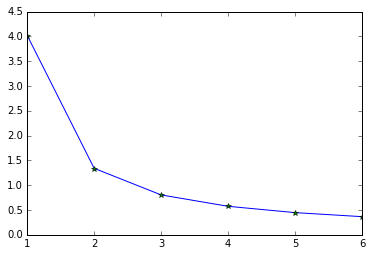

In [65]:
plt.plot(np.linspace(1,num_eigs, num_eigs), lam, '-')                         # Num
plt.plot(np.linspace(1,num_eigs, num_eigs), 4/(2*np.linspace(0,5, num_eigs)+1), '*')  # Analytic

### Field distribution

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


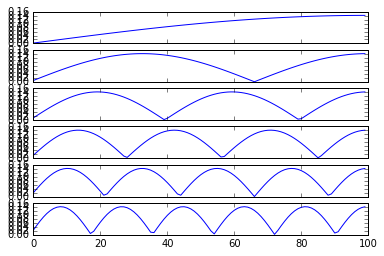

In [69]:
f, ax = plt.subplots(6,1, sharex=True, sharey=True)
for n in np.arange(V.shape[1]):
    ax[n].plot(np.abs(V[:,V_indicies[n]]),'-')

## Discretization artefacts
### Solve

In [152]:
discret = [20, 50, 200, 500]
eigs = []
field = []
num_eigs = 10

for num in discret:
    # Grid
    n   = num     # Num grid nodes
    dx  = 1. / num  # Step size for overall size of 1
    eps = 1.      #  Vacuum
    mu  = 1.      #  Vacuum
    A   = - 1. / (dx**2 * mu * eps)
    
    # Matrix
    # Forward

    diag = np.ones(n) * -A
    up_diag = np.ones(n) * A

    M_1 = sp.sparse.dia_matrix(([up_diag, diag], [1, 0]), [n,n])

    # Backward

    diag = np.ones(n) * 1
    up_diag = np.ones(n) * -1

    M_2 = sp.sparse.dia_matrix(([up_diag, diag], [-1, 0]), [n,n])

    M = M_1.dot(M_2)    
    
    # Solve
    kt = 2*sp.pi*1                                    # wave vector target to find resonance wavelength
    k2, V = linalg.eigs(M, k=num_eigs, M=None, sigma=kt**2)  # solve for eigenvalues and vectors

    V_indicies = np.linspace(0,num_eigs-1, num_eigs, dtype=np.int)
    k, V_indicies = (list(t) for t in zip(*sorted(zip(np.sqrt(k2), V_indicies))))

    lam = 2*sp.pi/np.real(k)                          # wavelength
    
    eigs.append(lam)
    field.append(V[:,V_indicies])
    

### Wavelength

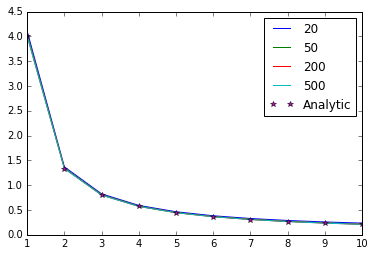

In [153]:
for i in range(len(eigs)):
    plt.plot(np.linspace(1,num_eigs, num_eigs), eigs[i], '-')                         # Num
    
plt.plot(np.linspace(1,num_eigs, num_eigs), 4/(2*np.linspace(0,num_eigs-1, num_eigs)+1), '*')  # Analytic
plt.legend([str(s) for s in discret] + ["Analytic"])

### No normalization, amplitude changes

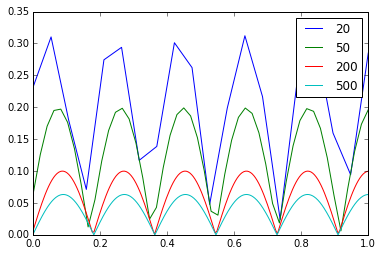

In [154]:
for f in field:
    #norm = np.max(np.abs(f[:,5]))
    norm = 1.
    plt.plot(np.linspace(0, 1, len(f[:,5])), np.divide(np.abs(f[:,5]), norm))

plt.legend([str(n) for n in discret])

### No normalization, phase changes

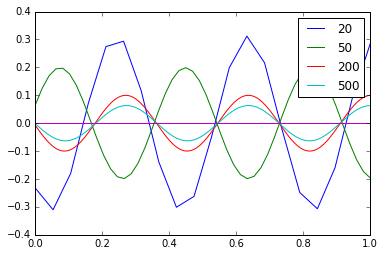

In [155]:
for f in field:
    #norm = np.max(np.abs(f[:,5]))
    norm = 1.
    plt.plot(np.linspace(0, 1, len(f[:,5])), np.divide(np.real(f[:,5]), norm))

plt.plot([0, 1], [0., 0.])
plt.legend([str(n) for n in discret])

### Normalization

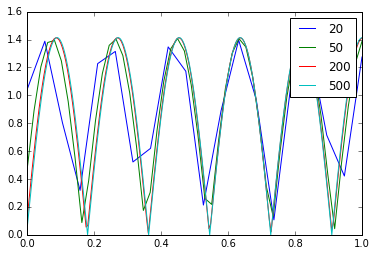

In [158]:
for f, n in zip(field, discret):
    #norm = np.max(np.abs(f[:,5]))
    norm = 1/np.sqrt(n)
    plt.plot(np.linspace(0, 1, len(f[:,5])), np.divide(np.abs(f[:,5]), norm))

plt.legend([str(n) for n in discret])